**Exercise 7.11**. Simulate an MA(1) series with $\theta = −0.6$ and $n = 48$.

**(a)** Find the maximum likelihood estimate of $\theta$.

**(b)** If your software permits, repeat part (a) many times with a new simulated series using the same parameters and same sample size.

**(c)** Form the sampling distribution of the maximum likelihood estimates of $\theta$.

**(d)** Are the estimates (approximately) unbiased?

**(e)** Calculate the variance of your sampling distribution and compare it with the large-sample result in Equation (7.4.11) on page 161.

**Solution**.

In [1]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm_notebook

import warnings

import matplotlib.pyplot as plt
%matplotlib inline

def generate_arima(phi=[], d=0, theta=[], n=100):
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

In [2]:
np.random.seed(0)

B = 10000

estimates = np.empty(B)

# Filter out MLE convergence warnings, 
# as in https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for i in tqdm_notebook(range(B), 'Estimate'):
        estimates[i] = -ARIMA(generate_arima(theta=[-0.6], n=48), order=(0, 0, 1)).fit(method='mle', disp=-1).maparams[0]

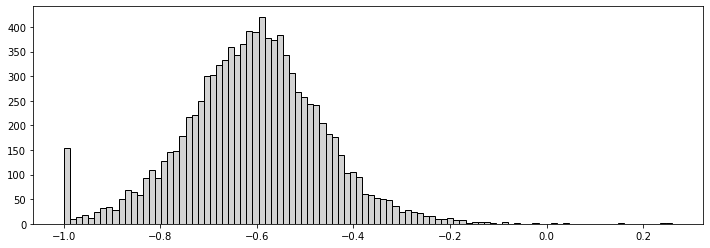

In [3]:
plt.figure(figsize=(12, 4))
plt.hist(estimates, bins=100, edgecolor='black', color='lightgrey')
plt.show()

In [4]:
print('Bootstrap estimate mean: %.3f' % estimates.mean())
print('Bootstrap estimate SE:\t %.3f' % estimates.std())
print('5%% percentile:\t\t %.3f' % (np.percentile(estimates, 5)))
print('95%% percentile:\t\t %.3f' % (np.percentile(estimates, 95)))

Bootstrap estimate mean: -0.608
Bootstrap estimate SE:	 0.144
5% percentile:		 -0.851
95% percentile:		 -0.380


The large sample result from Equation (7.4.11) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \theta^2}{n} $$

which is a variance of 0.0133, or a standard error of 0.115.  The bootstrap process produces a sampling distribution that seems to have a bit higher standard error, but have mean results that are still within the original standard error -- results seem unbiased.

**Exercise 7.12**.  Repeat Exercise 7.11 using a sample size of n = 120.

**Solution**.

In [5]:
np.random.seed(0)

B = 10000

estimates = np.empty(B)

# Filter out MLE convergence warnings, 
# as in https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for i in tqdm_notebook(range(B), 'Estimate'):
        estimates[i] = -ARIMA(generate_arima(theta=[-0.6], n=120), order=(0, 0, 1)).fit(method='mle', disp=-1).maparams[0]

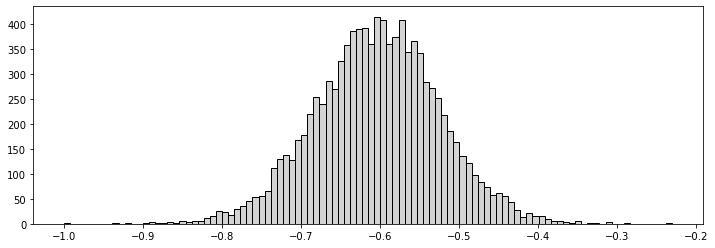

In [6]:
plt.figure(figsize=(12, 4))
plt.hist(estimates, bins=100, edgecolor='black', color='lightgrey')
plt.show()

In [7]:
print('Bootstrap estimate mean: %.3f' % estimates.mean())
print('Bootstrap estimate SE:\t %.3f' % estimates.std())
print('5%% percentile:\t\t %.3f' % (np.percentile(estimates, 5)))
print('95%% percentile:\t\t %.3f' % (np.percentile(estimates, 95)))

Bootstrap estimate mean: -0.604
Bootstrap estimate SE:	 0.079
5% percentile:		 -0.733
95% percentile:		 -0.476


The large sample result from Equation (7.4.11) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \theta^2}{n} $$

which is a variance of 0.00533, or a standard error of 0.073.  The bootstrap process produces a sampling distribution that seems to have a variance in line with this value, and an unbiased result.

**Exercise 7.13**. Simulate an AR(1) series with $\phi = 0.8$ and $n = 48$.

**(a)** Find the method-of-moments estimate of φ.

**(b)** Find the conditional least squares estimate of φ and compare it with part (a).

**(c)** Find the maximum likelihood estimate of φ and compare it with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare your results with your results from the first simulation.

**Solution**.

In [8]:
from statsmodels.tsa.stattools import acf

def estimate_ar1_mom(x):
    return acf(x, fft=False, nlags=1)[1]

In [9]:
np.random.seed(0)
Y = generate_arima(phi=[0.8], n=48)

**(a)**

In [10]:
print('Method of moments estimate: \t\t%.5f' % estimate_ar1_mom(Y))

Method of moments estimate: 		0.79884


**(b)**

In [11]:
print('Conditional least squares estimate: \t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='css').arparams[0])

Conditional least squares estimate: 	0.82019


Results are both close to the true value of $\phi = 0.8$, but for this series the method-of-moments method produced a better estimate.

**(c)**

In [12]:
print('Maximum likelihood estimate: \t\t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='mle').arparams[0])

Maximum likelihood estimate: 		0.80559


Result is still close to the true value of $\phi = 0.8$ -- closer than the CSS method, but the method-of-moments still produced a better estimate.

**(d)**

In [13]:
np.random.seed(1)
Y = generate_arima(phi=[0.8], n=48)
print('Method of moments estimate: \t\t%.5f' % estimate_ar1_mom(Y))
print('Conditional least squares estimate: \t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='css').arparams[0])
print('Maximum likelihood estimate: \t\t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='mle').arparams[0])

Method of moments estimate: 		0.49153
Conditional least squares estimate: 	0.55163
Maximum likelihood estimate: 		0.58561


**Exercise 7.14**.  Simulate an AR(1) series with $\phi = −0.5$ and $n = 60$.

**(a)** Find the method-of-moments estimate of $\phi$.

**(b)** Find the conditional least squares estimate of $\phi$ and compare it with part (a).

**(c)** Find the maximum likelihood estimate of $\phi$ and compare it with parts (a) and (b).

**(d)** Repeat parts (a), (b), and (c) with a new simulated series using the same parameters and same sample size. Compare your results with your results from the first simulation.

**Solution**.

In [14]:
np.random.seed(0)
Y = generate_arima(phi=[-0.5], n=60)

**(a)**

In [15]:
print('Method of moments estimate: \t\t%.5f' % estimate_ar1_mom(Y))

Method of moments estimate: 		-0.47478


**(b)**

In [16]:
print('Conditional least squares estimate: \t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='css').arparams[0])

Conditional least squares estimate: 	-0.47478


The estimate produced by the CSS method appears to be almost identical to the one produced by the method-of-moments method.

**(c)**

In [17]:
print('Maximum likelihood estimate: \t\t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='mle').arparams[0])

Maximum likelihood estimate: 		-0.48328


The estimate produced by the ML method is closer to the true value than the estimates produced by the other methods.

**(d)**

In [18]:
np.random.seed(100)
Y = generate_arima(phi=[-0.5], n=60)
print('Method of moments estimate: \t\t%.5f' % estimate_ar1_mom(Y))
print('Conditional least squares estimate: \t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='css').arparams[0])
print('Maximum likelihood estimate: \t\t%.5f' % ARIMA(Y, order=(1, 0, 0)).fit(method='mle').arparams[0])

Method of moments estimate: 		-0.50269
Conditional least squares estimate: 	-0.50371
Maximum likelihood estimate: 		-0.51714


The method of moments this time appears to provide the better estimate; CSS and ML estimates are worse, though still close.

**Exercise 7.15**.  Simulate an AR(1) series with $\phi = 0.7$ and $n = 100$.

**(a)** Find the maximum likelihood estimate of $\phi$.

**(b)** If your software permits, repeat part (a) many times with a new simulated series using the same parameters and same sample size.

**(c)** Form the sampling distribution of the maximum likelihood estimates of $\phi$.

**(d)** Are the estimates (approximately) unbiased?

**(e)** Calculate the variance of your sampling distribution and compare it with the large-sample result in Equation (7.4.9) on page 161.

**Solution**.

In [19]:
np.random.seed(0)

B = 10000

estimates = np.empty(B)

# Filter out MLE convergence warnings, 
# as in https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for i in tqdm_notebook(range(B), 'Estimate'):
        estimates[i] = -ARIMA(generate_arima(phi=[0.7], n=100), order=(1, 0, 0)).fit(method='mle', disp=-1).arparams[0]

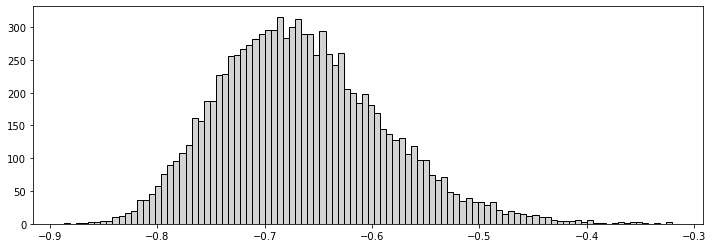

In [20]:
plt.figure(figsize=(12, 4))
plt.hist(estimates, bins=100, edgecolor='black', color='lightgrey')
plt.show()

In [21]:
print('Bootstrap estimate mean: %.3f' % estimates.mean())
print('Bootstrap estimate SE:\t %.3f' % estimates.std())
print('5%% percentile:\t\t %.3f' % (np.percentile(estimates, 5)))
print('95%% percentile:\t\t %.3f' % (np.percentile(estimates, 95)))

Bootstrap estimate mean: -0.666
Bootstrap estimate SE:	 0.077
5% percentile:		 -0.780
95% percentile:		 -0.532


The large sample result from Equation (7.4.9) is 

$$ \text{Var}[\hat{\theta}] \approx \frac{1 - \phi^2}{n} $$

which is a variance of 0.0051, or a standard error of 0.0714.  The bootstrap process produces a sampling distribution that seems to have a variance in line with this value, and an unbiased result.